# Credit Card Approval Prediction Model

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

# Datasets Summary

## Application Details Dataset

### Import the .csv file and view the head of it

In [2]:
appdf = pd.read_csv('application_record.csv')
appdf.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


### Shape of the dataset

In [3]:
appdf.shape

(438557, 18)

### Column Names 

In [4]:
appdf.keys()

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

### Non-Null Count and DType of the columns

In [5]:
appdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

### Description of the non-object columns 

In [6]:
appdf.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,438557.0,6.022176e+06,571637.023257,5008804.0,5609375.0,6047745.0,6456971.0,7999952.0
CNT_CHILDREN,438557.0,4.273903e-01,0.724882,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,438557.0,1.875243e+05,110086.853066,26100.0,121500.0,160780.5,225000.0,6750000.0
DAYS_BIRTH,438557.0,-1.599790e+04,4185.030007,-25201.0,-19483.0,-15630.0,-12514.0,-7489.0
DAYS_EMPLOYED,438557.0,6.056368e+04,138767.799647,-17531.0,-3103.0,-1467.0,-371.0,365243.0
FLAG_MOBIL,438557.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,438557.0,2.061328e-01,0.404527,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,438557.0,2.877710e-01,0.452724,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,438557.0,1.082071e-01,0.310642,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,438557.0,2.194465e+00,0.897207,1.0,2.0,2.0,3.0,20.0


### No. of unique values in each column

In [7]:
appdf.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

### No. of NULL values in each column

In [8]:
appdf.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

## Credit Records Dataset

### Import the .csv file and view the head of it

In [9]:
creditdf = pd.read_csv('credit_record.csv')
creditdf.head(10)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


### Shape of the dataset

In [10]:
creditdf.shape

(1048575, 3)

### Column Names 

In [11]:
creditdf.keys()

Index(['ID', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

### Non-Null Count and DType of the columns

In [12]:
creditdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


### Description of the non-object columns 

In [13]:
creditdf.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


### No. of unique values in each column

In [14]:
creditdf.nunique()

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64

### No. of NULL values in each column

In [15]:
creditdf.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

# Exploratory Data Analysis

## Application Records Count Plots

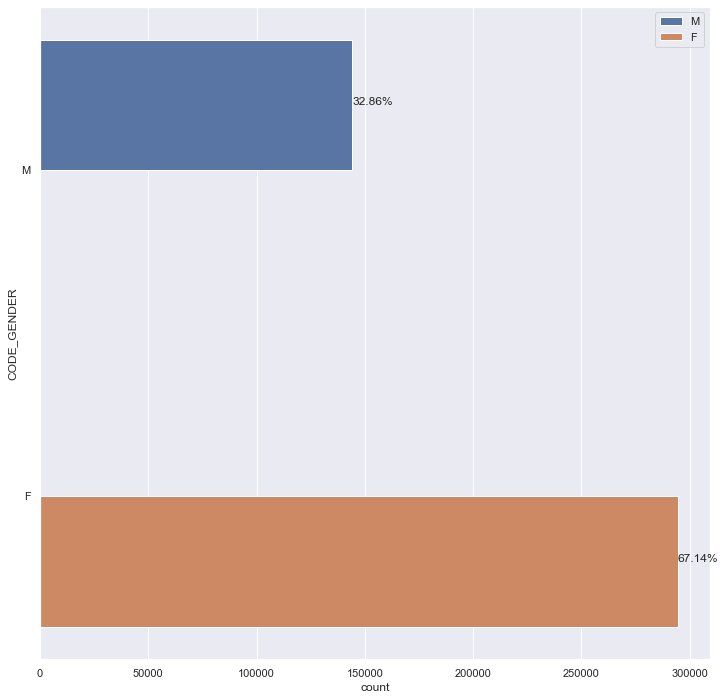

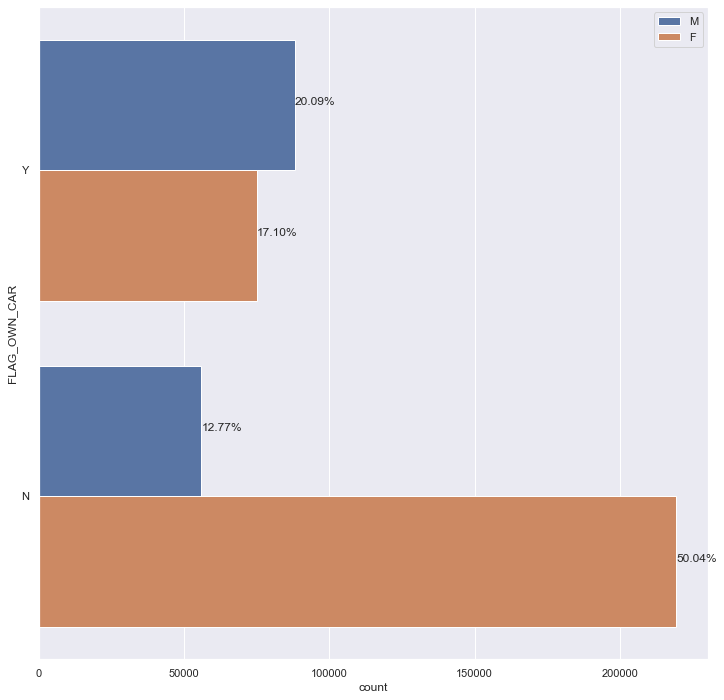

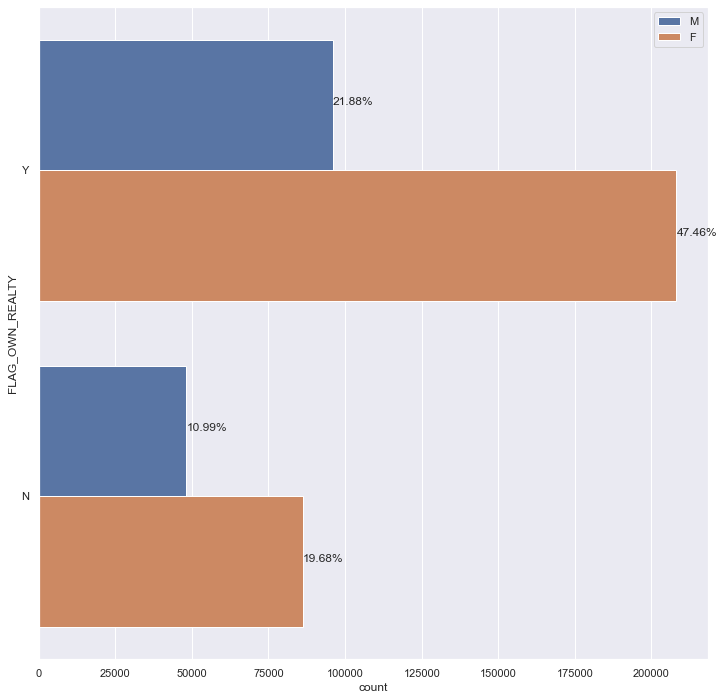

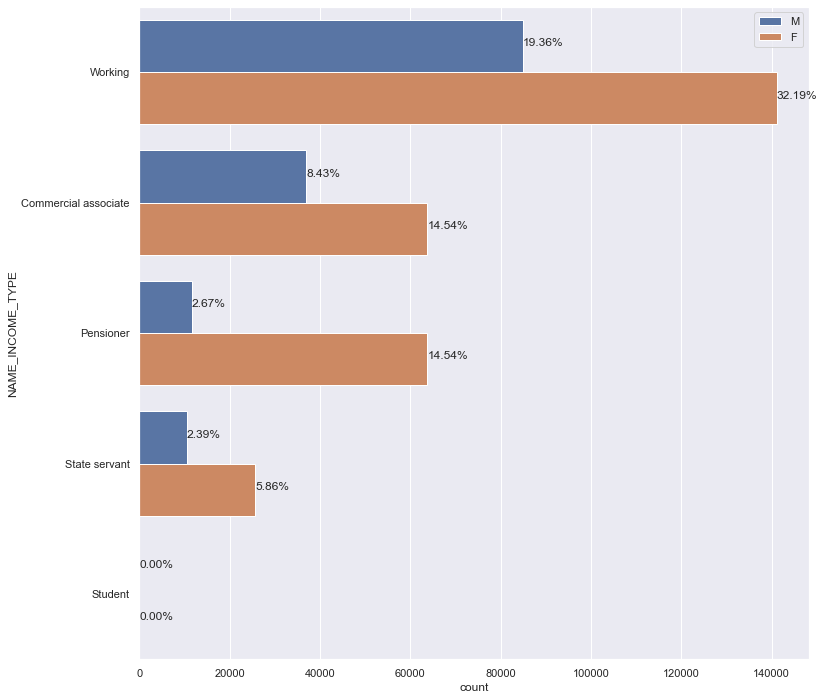

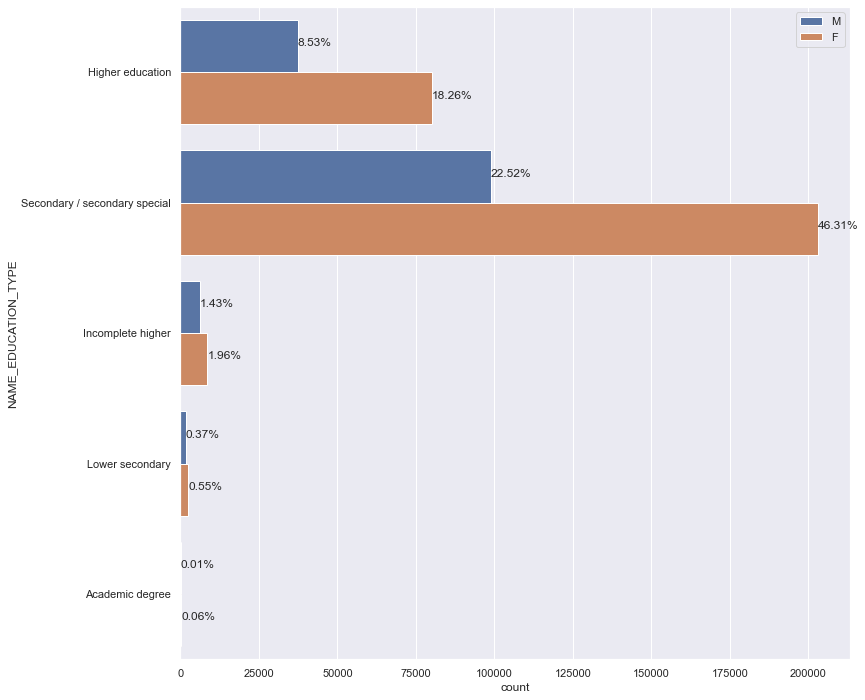

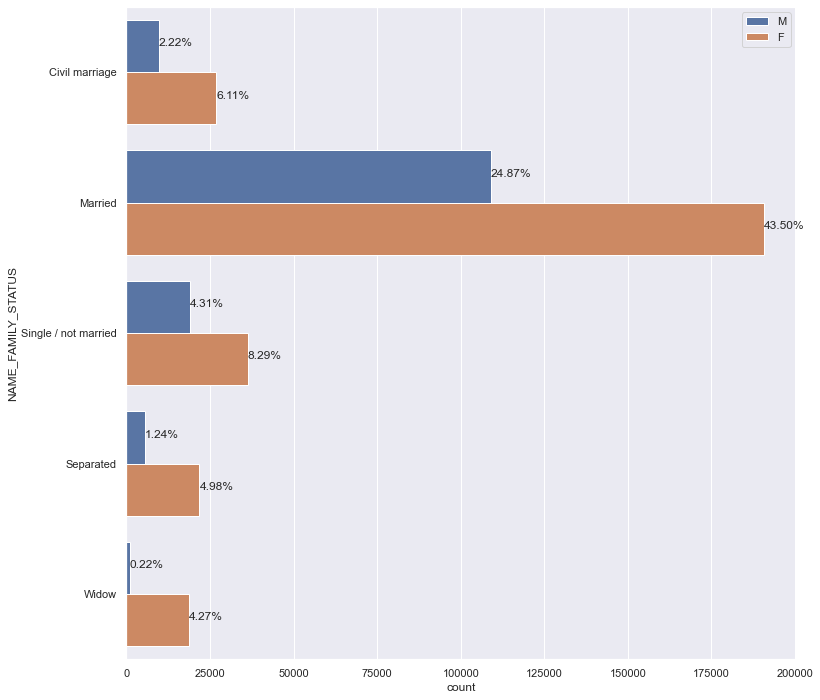

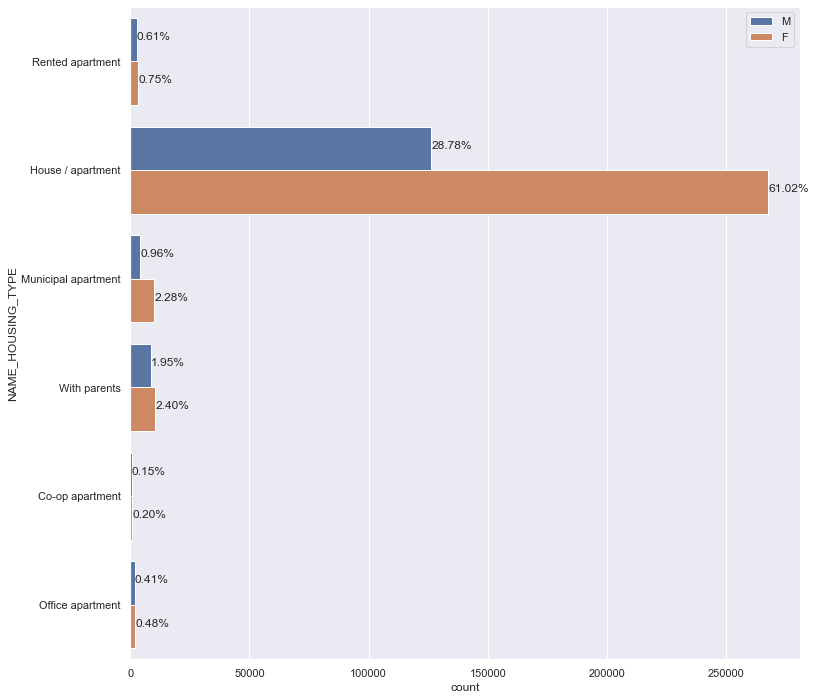

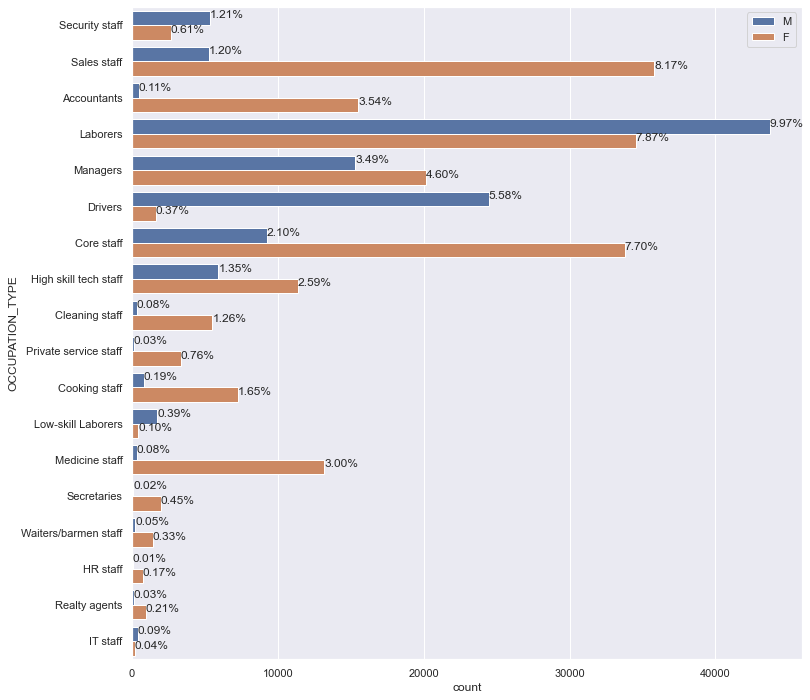

In [16]:
def countplot_appdf(app_features, app_hue):
    for app_feature in app_features:
        
        plt.figure(figsize = (12, 12))
        ax = sns.countplot(y = appdf[app_feature], hue = app_hue , data = appdf)
        plt.legend(loc = 'best')
        n = len(appdf[app_feature])
        
        for bar in ax.patches:
            percentage = '{:.2f}%'.format(100 * bar.get_width()/n)
            x = bar.get_x() + bar.get_width() + 0.05
            y = bar.get_y() + bar.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()
    
app_features = []
for column in appdf.columns:
    if (appdf[column].dtype == 'object'):
        app_features.append(column)

countplot_appdf(app_features, 'CODE_GENDER')

## Credit Records Count Plot

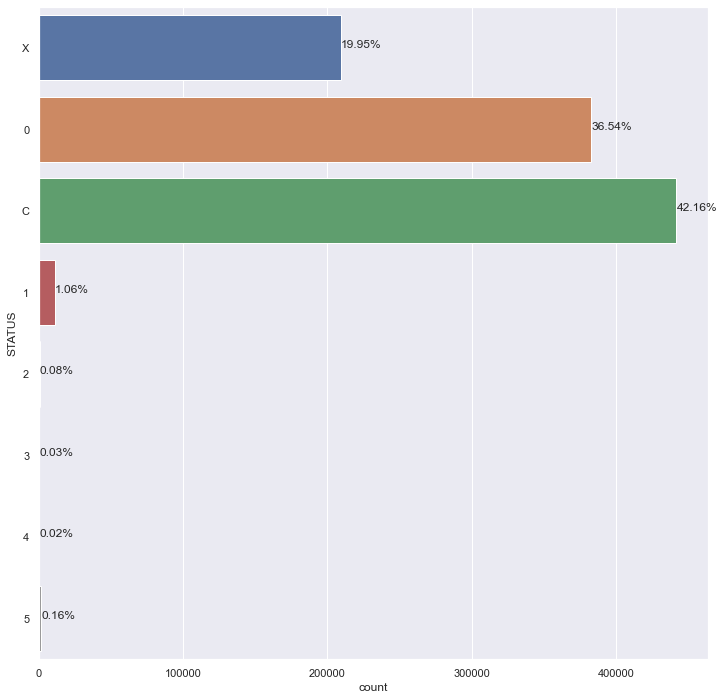

In [17]:
def countplot_creditdf(credit_features):
    for credit_feature in credit_features:
        
        plt.figure(figsize = (12, 12))
        ax = sns.countplot(y = creditdf[credit_feature], data = creditdf)
        n = len(creditdf[credit_feature])
        
        for bar in ax.patches:
            percentage = '{:.2f}%'.format(100 * bar.get_width()/n)
            x = bar.get_x() + bar.get_width() + 0.05
            y = bar.get_y() + bar.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()
    
credit_features = []
for column in creditdf.columns:
    if (creditdf[column].dtype == 'object'):
        credit_features.append(column)

countplot_creditdf(credit_features)

# Data Cleaning

## Application Records Dataset

### Insert 'AGE' column and drop 'DAYS_BIRTH' column

In [18]:
age = []

for i in range(0, len(appdf)):
    res = (abs(appdf['DAYS_BIRTH'][i]) // 365.25)
    age.append(res)

In [19]:
appdf.insert(11,'AGE', age)
appdf.drop(['DAYS_BIRTH'], axis = 1, inplace = True)

### Converting employed days of unemployed people to 0

In [20]:
appdf.loc[(appdf['DAYS_EMPLOYED'] > 0), 'DAYS_EMPLOYED'] = 0

### Insert 'EMPLOYED_YEARS' column and drop 'DAYS_EMPLOYED' column

In [21]:
employed_years = []

for j in range(0, len(appdf)):
    res1 = (abs(appdf['DAYS_EMPLOYED'][j]) // 365.25)
    employed_years.append(res1)

In [22]:
appdf.insert(13,'EMPLOYED_YEARS', employed_years)
appdf.drop(['DAYS_EMPLOYED'], axis = 1, inplace = True)

### Drop duplicate IDs 

In [23]:
appdf.drop_duplicates(subset = ['ID'], inplace=True)

### Remove 'FLAG_MOBIL' column as unique value is only 1

In [24]:
appdf.drop(['FLAG_MOBIL'], axis = 1, inplace=True)

### Filling NaN values in 'OCCUPATION_TYPE' column

In [25]:
appdf['OCCUPATION_TYPE'].fillna(value = 'Occupation Not Identified', inplace=True)

### Mentioning 'OCCUPATION_TYPE'  as 'Retired' of those having 'NAME_INCOME_TYPE' as 'Pensioner'

In [26]:
appdf.loc[(appdf['NAME_INCOME_TYPE'] == 'Pensioner') & (appdf['OCCUPATION_TYPE'] == 'Occupation Not Identified'), 'OCCUPATION_TYPE'] = 'Retired'

## Credit Records Dataset

### Drop duplicate values

In [27]:
creditdf[['ID', 'MONTHS_BALANCE']].drop_duplicates()

,ID,MONTHS_BALANCE
0,5001711,0
1,5001711,-1
2,5001711,-2
3,5001711,-3
4,5001712,0
...,...,...
1048570,5150487,-25
1048571,5150487,-26
1048572,5150487,-27
1048573,5150487,-28


### Convert the given Debt Fields into Good/Neutral/Bad Debt tags

In [28]:
convert_to = {'C' : 'Good_Debt', 'X' : 'Good_Debt', '0' : 'Good_Debt', '1' : 'Neutral_Debt', '2' : 'Neutral_Debt', '3' : 'Bad_Debt', '4' : 'Bad_Debt', '5' : 'Bad_Debt'}
creditdf.replace({'STATUS' : convert_to}, inplace = True) 

creditdf

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,Good_Debt
1,5001711,-1,Good_Debt
2,5001711,-2,Good_Debt
3,5001711,-3,Good_Debt
4,5001712,0,Good_Debt
...,...,...,...
1048570,5150487,-25,Good_Debt
1048571,5150487,-26,Good_Debt
1048572,5150487,-27,Good_Debt
1048573,5150487,-28,Good_Debt


### Return the no. of months for which an ID maps to a Debt Tag

In [29]:
creditdf = creditdf.value_counts(subset = ['ID', 'STATUS']).unstack(fill_value = 0)
creditdf

STATUS,Bad_Debt,Good_Debt,Neutral_Debt
ID,,,
5001711,0,4,0
5001712,0,19,0
5001713,0,22,0
5001714,0,15,0
5001715,0,60,0
...,...,...,...
5150482,0,18,0
5150483,0,18,0
5150484,0,13,0


### Define conditions for which the credit card may be approved

In [30]:
creditdf.loc[(creditdf['Good_Debt'] > creditdf['Neutral_Debt']), 'CREDIT_CARD_APPROVAL_STATUS'] = 1
creditdf.loc[(creditdf['Good_Debt'] > creditdf['Bad_Debt']), 'CREDIT_CARD_APPROVAL_STATUS'] = 1
creditdf.loc[(creditdf['Neutral_Debt'] > creditdf['Bad_Debt']), 'CREDIT_CARD_APPROVAL_STATUS'] = 1
creditdf.loc[(creditdf['Neutral_Debt'] > creditdf['Good_Debt']), 'CREDIT_CARD_APPROVAL_STATUS'] = 0
creditdf.loc[(creditdf['Bad_Debt'] > creditdf['Good_Debt']), 'CREDIT_CARD_APPROVAL_STATUS'] = 0
creditdf.loc[(creditdf['Bad_Debt'] > creditdf['Neutral_Debt']), 'CREDIT_CARD_APPROVAL_STATUS'] = 0

### Convert the 'CREDIT_CARD_APPROVAL_STATUS' into 'int' type

In [31]:
creditdf['CREDIT_CARD_APPROVAL_STATUS'] = creditdf['CREDIT_CARD_APPROVAL_STATUS'].astype('int')
creditdf

STATUS,Bad_Debt,Good_Debt,Neutral_Debt,CREDIT_CARD_APPROVAL_STATUS
ID,,,,
5001711,0,4,0,1
5001712,0,19,0,1
5001713,0,22,0,1
5001714,0,15,0,1
5001715,0,60,0,1
...,...,...,...,...
5150482,0,18,0,1
5150483,0,18,0,1
5150484,0,13,0,1


### Drop the Debt Tags columns and only keep the approval status

In [32]:
creditdf.drop(['Bad_Debt', 'Good_Debt', 'Neutral_Debt'], axis = 1, inplace = True)
creditdf

STATUS,CREDIT_CARD_APPROVAL_STATUS
ID,
5001711,1
5001712,1
5001713,1
5001714,1
5001715,1
...,...
5150482,1
5150483,1
5150484,1


### Count of approvals and rejections for credit card applications

In [33]:
creditdf['CREDIT_CARD_APPROVAL_STATUS'].value_counts()

1    45726
0      259
Name: CREDIT_CARD_APPROVAL_STATUS, dtype: int64

# Data Encoding

## Application Records Dataset

### Dummy Encoding 

In [34]:
encoded = pd.get_dummies(appdf[['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']], prefix=['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE'], drop_first = True)
encoded

,CODE_GENDER_M,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,...,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Occupation Not Identified,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Retired,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,1,1,1,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,1,1,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
438553,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
438554,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
438555,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Join the encoded dataset with the original dataset

In [35]:
appdf = appdf.join(encoded)

### Drop the non-encoded columns

In [36]:
appdf.drop(['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE'], axis = 1, inplace = True)

# Merge the datasets

## Merge 'Application Records' and 'Credit Records' Dataset

### Merge both datasets on common column 'ID'

In [37]:
merged_df = appdf.reset_index().merge(creditdf, on = 'ID').set_index('index')
merged_df

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE,EMPLOYED_YEARS,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_M,...,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Occupation Not Identified,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Retired,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,CREDIT_CARD_APPROVAL_STATUS
index,,,,,,,,,,,,,,,,,,,,,
0,5008804,0,427500.0,32.0,12.0,1,0,0,2.0,1,...,0,1,0,0,0,0,0,0,0,1
1,5008805,0,427500.0,32.0,12.0,1,0,0,2.0,1,...,0,1,0,0,0,0,0,0,0,1
2,5008806,0,112500.0,58.0,3.0,0,0,0,2.0,1,...,0,0,0,0,0,0,0,1,0,1
3,5008808,0,270000.0,52.0,8.0,0,1,1,1.0,0,...,0,0,0,0,0,1,0,0,0,1
4,5008809,0,270000.0,52.0,8.0,0,1,1,1.0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434808,5149828,0,315000.0,47.0,6.0,0,0,0,2.0,1,...,0,0,0,0,0,0,0,0,0,0
434809,5149834,0,157500.0,33.0,3.0,0,1,1,2.0,0,...,1,0,0,0,0,0,0,0,0,0
434810,5149838,0,157500.0,33.0,3.0,0,1,1,2.0,0,...,1,0,0,0,0,0,0,0,0,1


### Save merged_df as a .csv file

In [38]:
merged_df.to_csv('final_dataset.csv')

# Merged Dataset Summary

### Display head of the dataset

In [39]:
merged_df.head(10)

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,AGE,EMPLOYED_YEARS,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_M,...,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Occupation Not Identified,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Retired,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,CREDIT_CARD_APPROVAL_STATUS
index,,,,,,,,,,,,,,,,,,,,,
0,5008804,0,427500.0,32.0,12.0,1,0,0,2.0,1,...,0,1,0,0,0,0,0,0,0,1
1,5008805,0,427500.0,32.0,12.0,1,0,0,2.0,1,...,0,1,0,0,0,0,0,0,0,1
2,5008806,0,112500.0,58.0,3.0,0,0,0,2.0,1,...,0,0,0,0,0,0,0,1,0,1
3,5008808,0,270000.0,52.0,8.0,0,1,1,1.0,0,...,0,0,0,0,0,1,0,0,0,1
4,5008809,0,270000.0,52.0,8.0,0,1,1,1.0,0,...,0,0,0,0,0,1,0,0,0,1
5,5008810,0,270000.0,52.0,8.0,0,1,1,1.0,0,...,0,0,0,0,0,1,0,0,0,1
6,5008811,0,270000.0,52.0,8.0,0,1,1,1.0,0,...,0,0,0,0,0,1,0,0,0,1
7,5008812,0,283500.0,61.0,0.0,0,0,0,1.0,0,...,0,0,0,0,1,0,0,0,0,1
8,5008813,0,283500.0,61.0,0.0,0,0,0,1.0,0,...,0,0,0,0,1,0,0,0,0,1


### Shape of the dataset

In [40]:
merged_df.shape

(36457, 49)

### Column Names

In [41]:
merged_df.keys()

Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AGE', 'EMPLOYED_YEARS',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'CODE_GENDER_M', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_Y',
       'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant',
       'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents',
       'OCCUPATION_TYPE_Cleaning staff', 'OCCUPATION_TYPE_Cooking staff',
       'OCCUPATI

### Non-Null Count and Dtype of the columns

In [42]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 434812
Data columns (total 49 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 36457 non-null  int64  
 1   CNT_CHILDREN                                       36457 non-null  int64  
 2   AMT_INCOME_TOTAL                                   36457 non-null  float64
 3   AGE                                                36457 non-null  float64
 4   EMPLOYED_YEARS                                     36457 non-null  float64
 5   FLAG_WORK_PHONE                                    36457 non-null  int64  
 6   FLAG_PHONE                                         36457 non-null  int64  
 7   FLAG_EMAIL                                         36457 non-null  int64  
 8   CNT_FAM_MEMBERS                                    36457 non-null  float64
 9   CODE_

### Description of the columns

In [43]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,36457.0,5.078227e+06,41875.240788,5008804.0,5042028.0,5074614.0,5115396.0,5150487.0
CNT_CHILDREN,36457.0,4.303152e-01,0.742367,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,36457.0,1.866857e+05,101789.226482,27000.0,121500.0,157500.0,225000.0,1575000.0
AGE,36457.0,4.323203e+01,11.503981,20.0,34.0,42.0,53.0,68.0
EMPLOYED_YEARS,36457.0,5.612804e+00,6.414407,0.0,1.0,4.0,8.0,43.0
FLAG_WORK_PHONE,36457.0,2.255260e-01,0.417934,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,36457.0,2.948131e-01,0.455965,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,36457.0,8.972214e-02,0.285787,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,36457.0,2.198453e+00,0.911686,1.0,2.0,2.0,3.0,20.0
CODE_GENDER_M,36457.0,3.298955e-01,0.470181,0.0,0.0,0.0,1.0,1.0


### No. of unique values in each column

In [44]:
merged_df.nunique()

ID                                                   36457
CNT_CHILDREN                                             9
AMT_INCOME_TOTAL                                       265
AGE                                                     49
EMPLOYED_YEARS                                          44
FLAG_WORK_PHONE                                          2
FLAG_PHONE                                               2
FLAG_EMAIL                                               2
CNT_FAM_MEMBERS                                         10
CODE_GENDER_M                                            2
FLAG_OWN_CAR_Y                                           2
FLAG_OWN_REALTY_Y                                        2
NAME_INCOME_TYPE_Pensioner                               2
NAME_INCOME_TYPE_State servant                           2
NAME_INCOME_TYPE_Student                                 2
NAME_INCOME_TYPE_Working                                 2
NAME_EDUCATION_TYPE_Higher education                    

### No. of NULL values in each column

In [45]:
merged_df.isnull().sum()

ID                                                   0
CNT_CHILDREN                                         0
AMT_INCOME_TOTAL                                     0
AGE                                                  0
EMPLOYED_YEARS                                       0
FLAG_WORK_PHONE                                      0
FLAG_PHONE                                           0
FLAG_EMAIL                                           0
CNT_FAM_MEMBERS                                      0
CODE_GENDER_M                                        0
FLAG_OWN_CAR_Y                                       0
FLAG_OWN_REALTY_Y                                    0
NAME_INCOME_TYPE_Pensioner                           0
NAME_INCOME_TYPE_State servant                       0
NAME_INCOME_TYPE_Student                             0
NAME_INCOME_TYPE_Working                             0
NAME_EDUCATION_TYPE_Higher education                 0
NAME_EDUCATION_TYPE_Incomplete higher                0
NAME_EDUCA

# Splitting Training and Testing Sets

### Import Library

In [46]:
from sklearn.model_selection import train_test_split

### Defining X and Y arrays 

In [47]:
X = merged_df.drop('CREDIT_CARD_APPROVAL_STATUS', axis = 1)
Y = merged_df['CREDIT_CARD_APPROVAL_STATUS'] 

### Split Train and Test Set Sizes

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

### Shape of the Training and Testing Sets

In [49]:
X_train.shape , X_test.shape

((25519, 48), (10938, 48))

### Length of the Train and Test Sets

In [50]:
print("Size of X_train Set is:" , len(X_train))
print("Size of X_test Set is:" , len(X_test))
print("Size of Y_train Set is:" , len(Y_train))
print("Size of Y_test Set is:" , len(Y_test))

Size of X_train Set is: 25519
Size of X_test Set is: 10938
Size of Y_train Set is: 25519
Size of Y_test Set is: 10938


## Description of Training Sets

### Description of X_train

In [51]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,25519.0,5.078052e+06,41821.538255,5008804.0,5041980.5,5069485.0,5114537.5,5150487.0
CNT_CHILDREN,25519.0,4.275638e-01,0.737299,0.0,0.0,0.0,1.0,14.0
AMT_INCOME_TOTAL,25519.0,1.864114e+05,102160.789245,27000.0,121500.0,157500.0,225000.0,1575000.0
AGE,25519.0,4.325534e+01,11.483384,20.0,34.0,42.0,53.0,68.0
EMPLOYED_YEARS,25519.0,5.581214e+00,6.385472,0.0,1.0,4.0,8.0,43.0
FLAG_WORK_PHONE,25519.0,2.235981e-01,0.416664,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,25519.0,2.933109e-01,0.455289,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,25519.0,9.142208e-02,0.288214,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,25519.0,2.195188e+00,0.907139,1.0,2.0,2.0,3.0,15.0
CODE_GENDER_M,25519.0,3.283044e-01,0.469605,0.0,0.0,0.0,1.0,1.0


### Description of Y_train

In [52]:
Y_train.describe().T

count    25519.000000
mean         0.993103
std          0.082762
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: CREDIT_CARD_APPROVAL_STATUS, dtype: float64

## Description of Testing Sets

### Description of X_test

In [53]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10938.0,5.078636e+06,41999.329968,5008808.0,5042125.75,5078827.0,5115607.75,5150477.0
CNT_CHILDREN,10938.0,4.367343e-01,0.754052,0.0,0.00,0.0,1.00,19.0
AMT_INCOME_TOTAL,10938.0,1.873258e+05,100918.777470,29250.0,121500.00,157500.0,225000.00,1575000.0
AGE,10938.0,4.317764e+01,11.552235,21.0,34.00,42.0,53.00,68.0
EMPLOYED_YEARS,10938.0,5.686506e+00,6.481108,0.0,1.00,4.0,8.00,41.0
FLAG_WORK_PHONE,10938.0,2.300238e-01,0.420867,0.0,0.00,0.0,0.00,1.0
FLAG_PHONE,10938.0,2.983178e-01,0.457541,0.0,0.00,0.0,1.00,1.0
FLAG_EMAIL,10938.0,8.575608e-02,0.280016,0.0,0.00,0.0,0.00,1.0
CNT_FAM_MEMBERS,10938.0,2.206071e+00,0.922206,1.0,2.00,2.0,3.00,20.0
CODE_GENDER_M,10938.0,3.336076e-01,0.471523,0.0,0.00,0.0,1.00,1.0


### Description of Y_test

In [54]:
Y_test.describe().T

count    10938.000000
mean         0.994515
std          0.073864
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: CREDIT_CARD_APPROVAL_STATUS, dtype: float64

# Machine Learning 

## Import ML Model Libraries from Scikit-Learn

In [55]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

## Train the ML Models

### Support Vector Machine

In [56]:
from sklearn.svm import SVC

svm_model = svm.SVC()
svm_model.fit(X_train, Y_train)

SVC()

In [57]:
svm_model_score = svm_model.score(X_test, Y_test)
svm_model_score

0.9945145364783324

### Gradient Boosting Classifier 

In [58]:
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, Y_train)

GradientBoostingClassifier()

In [59]:
gbc_model_score = gbc_model.score(X_test, Y_test)
gbc_model_score

0.9925946242457487

### XGBoost Classifier

In [60]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [61]:
xgb_model_score = xgb_model.score(X_test, Y_test)
xgb_model_score

0.9938745657341379

### Random Forest 

In [62]:
ranfor_model = RandomForestClassifier()
ranfor_model.fit(X_train, Y_train)

RandomForestClassifier()

In [63]:
ranfor_model_score = ranfor_model.score(X_test, Y_test)
ranfor_model_score

0.9930517462058878

### Decision Tree

In [64]:
from sklearn import tree

dectree_model = tree.DecisionTreeClassifier()
dectree_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [65]:
dectree_model_score = dectree_model.score(X_test, Y_test)
dectree_model_score

0.9913146827573597

### Logistic Regression

In [66]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, Y_train)

LogisticRegression()

In [67]:
logreg_model_score = logreg_model.score(X_test, Y_test)
logreg_model_score

0.9945145364783324

### Gaussian Naive Bayes 

In [68]:
gaussnb_model = GaussianNB()
gaussnb_model.fit(X_train, Y_train)

GaussianNB()

In [69]:
gaussnb_model_score = gaussnb_model.score(X_test, Y_test)
gaussnb_model_score

0.9924117754616932

### K-Nearest Neighbors

In [70]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [71]:
knn_model_score = knn_model.score(X_test, Y_test)
knn_model_score

0.994240263302249

### Multi-Layer Perceptron

In [72]:
mlp_model = MLPClassifier()
mlp_model.fit(X_train, Y_train)

MLPClassifier()

In [73]:
mlp_model_score = mlp_model.score(X_test, Y_test)
mlp_model_score

0.9945145364783324

## Show model scores in a Dataframe

In [74]:
scores = {'model scores': [svm_model_score, gbc_model_score, xgb_model_score, ranfor_model_score, dectree_model_score, logreg_model_score, gaussnb_model_score, knn_model_score, mlp_model_score] , 
          'model': ["Support Vector Machine", "Gradient Boosting Classifier", "XGBoost Classifier", "Random Forest", "Decision Tree", "Logistic Regression", "Gaussian Naive Bayes", "K-Nearest Neighbors", "Multi-Layer Perceptron"]}

score_df = pd.DataFrame(scores, columns = ['model', 'model scores'])
score_df

,model,model scores
0,Support Vector Machine,0.994515
1,Gradient Boosting Classifier,0.992595
2,XGBoost Classifier,0.993875
3,Random Forest,0.993052
4,Decision Tree,0.991315
5,Logistic Regression,0.994515
6,Gaussian Naive Bayes,0.992412
7,K-Nearest Neighbors,0.994240
8,Multi-Layer Perceptron,0.994515


## Plot the model scores

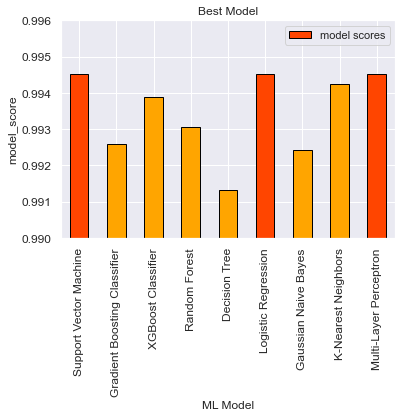

In [75]:
maxx = score_df['model scores'][0]

for i in score_df['model scores']:
    if i > maxx:
        maxx = i
        
colors = []

for i in range(0, len(score_df['model scores'])):
    
    if score_df['model scores'][i] == maxx:
        colors.append('orangered')
    else:
        colors.append('orange')

score_df.plot(x = "model" , y = "model scores", kind = "bar" , title = "Best Model", xlabel = "ML Model" , ylabel = "model_score", ylim = (0.99, 0.996), fontsize = 12, color = colors, edgecolor = "black")

## Show model score % in a Dataframe

In [76]:
scores_perc = {'model scores in %': [svm_model_score*100, gbc_model_score*100, xgb_model_score*100, ranfor_model_score*100, dectree_model_score*100, logreg_model_score*100, gaussnb_model_score*100, knn_model_score*100, mlp_model_score*100] , 
          'model': ["Support Vector Machine", "Gradient Boosting Classifier", "XGBoost Classifier", "Random Forest", "Decision Tree", "Logistic Regression", "Gaussian Naive Bayes", "K-Nearest Neighbors", "Multi-Layer Perceptron"]}

score_perc_df = pd.DataFrame(scores_perc, columns = ['model', 'model scores in %'])
score_perc_df

,model,model scores in %
0,Support Vector Machine,99.451454
1,Gradient Boosting Classifier,99.259462
2,XGBoost Classifier,99.387457
3,Random Forest,99.305175
4,Decision Tree,99.131468
5,Logistic Regression,99.451454
6,Gaussian Naive Bayes,99.241178
7,K-Nearest Neighbors,99.424026
8,Multi-Layer Perceptron,99.451454


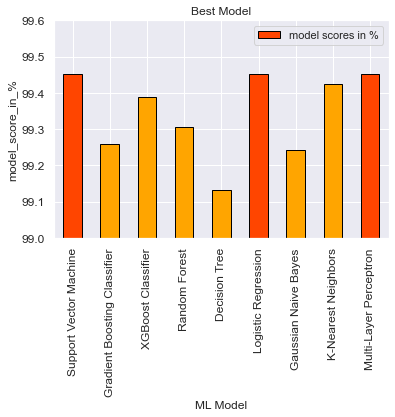

In [77]:
maxx_perc = score_perc_df['model scores in %'][0]

for i in score_perc_df['model scores in %']:
    if i > maxx:
        maxx = i
        
colors = []

for i in range(0, len(score_perc_df['model scores in %'])):
    
    if score_perc_df['model scores in %'][i] == maxx:
        colors.append('orangered')
    else:
        colors.append('orange')

score_perc_df.plot(x = "model" , y = "model scores in %", kind = "bar" , title = "Best Model", xlabel = "ML Model" , ylabel = "model_score_in_%", ylim = (99, 99.6), fontsize = 12, color = colors, edgecolor = "black")

# Confusion Matrix of Models

## Import Library

In [78]:
from sklearn.metrics import confusion_matrix

### Support Vector Machine

Text(39.5, 0.5, 'Truth')

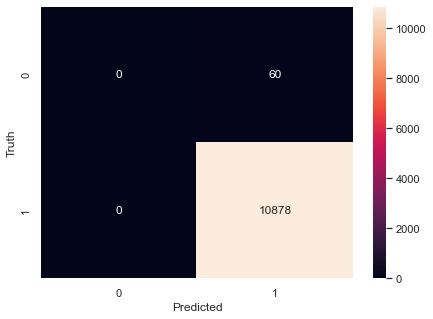

In [79]:
Y_predicted_svm = svm_model.predict(X_test)
cm = confusion_matrix(Y_test, Y_predicted_svm)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Gradient Boosting Classifier

Text(39.5, 0.5, 'Truth')

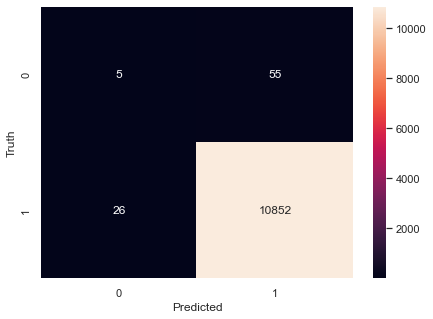

In [80]:
Y_predicted_gbc = gbc_model.predict(X_test)
cm = confusion_matrix(Y_test, Y_predicted_gbc)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### XGBoost Classifier

Text(39.5, 0.5, 'Truth')

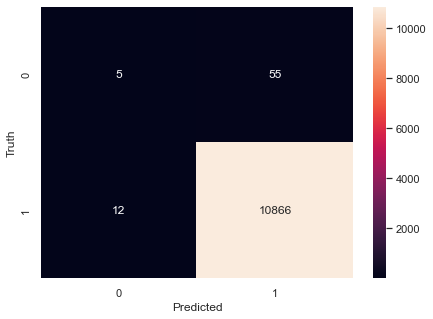

In [81]:
Y_predicted_xgb = xgb_model.predict(X_test)
cm = confusion_matrix(Y_test, Y_predicted_xgb)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Random Forest

Text(39.5, 0.5, 'Truth')

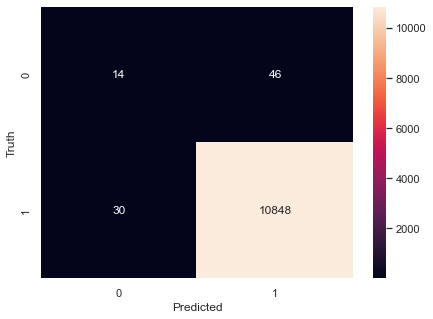

In [82]:
Y_predicted_ranfor = ranfor_model.predict(X_test)
cm = confusion_matrix(Y_test, Y_predicted_ranfor)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Decision Tree

Text(39.5, 0.5, 'Truth')

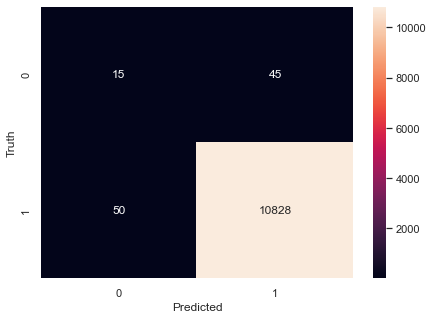

In [83]:
Y_predicted_dectree = dectree_model.predict(X_test)
cm = confusion_matrix(Y_test, Y_predicted_dectree)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Logistic Regression

Text(39.5, 0.5, 'Truth')

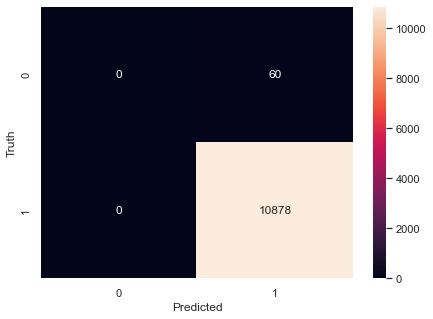

In [84]:
Y_predicted_logreg = logreg_model.predict(X_test)
cm = confusion_matrix(Y_test, Y_predicted_logreg)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Gaussian Naive Bayes

Text(39.5, 0.5, 'Truth')

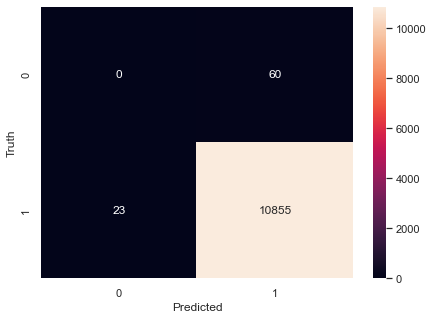

In [85]:
Y_predicted_gaussnb = gaussnb_model.predict(X_test)
cm = confusion_matrix(Y_test, Y_predicted_gaussnb)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### K-Nearest Neighbors

Text(39.5, 0.5, 'Truth')

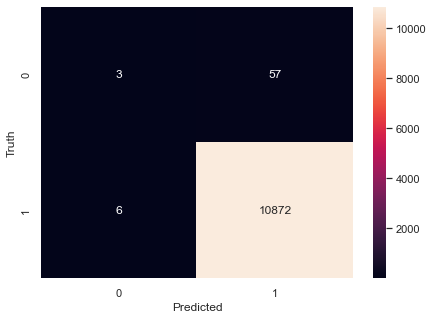

In [86]:
Y_predicted_knn = knn_model.predict(X_test)
cm = confusion_matrix(Y_test, Y_predicted_knn)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Multi-Layer Perceptron

Text(39.5, 0.5, 'Truth')

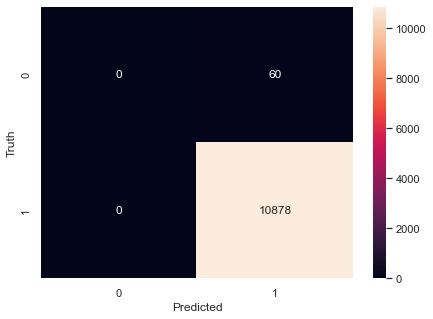

In [87]:
Y_predicted_mlp = mlp_model.predict(X_test)
cm = confusion_matrix(Y_test, Y_predicted_mlp)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Classification Reports of Models

## Import Library

In [88]:
from sklearn.metrics import classification_report

### Support Vector Machine

In [89]:
print(classification_report(Y_test, Y_predicted_svm, labels = [0, 1], target_names = ["Credit Card isn't Approved(0)", "Credit Card is Approved(1)"], zero_division = 0))

                               precision    recall  f1-score   support

Credit Card isn't Approved(0)       0.00      0.00      0.00        60
   Credit Card is Approved(1)       0.99      1.00      1.00     10878

                     accuracy                           0.99     10938
                    macro avg       0.50      0.50      0.50     10938
                 weighted avg       0.99      0.99      0.99     10938



### Gradient Boosting Classifier

In [90]:
print(classification_report(Y_test, Y_predicted_gbc, labels = [0, 1], target_names = ["Credit Card isn't Approved(0)", "Credit Card is Approved(1)"], zero_division = 0))

                               precision    recall  f1-score   support

Credit Card isn't Approved(0)       0.16      0.08      0.11        60
   Credit Card is Approved(1)       0.99      1.00      1.00     10878

                     accuracy                           0.99     10938
                    macro avg       0.58      0.54      0.55     10938
                 weighted avg       0.99      0.99      0.99     10938



### XGBoost Classifier

In [91]:
print(classification_report(Y_test, Y_predicted_xgb, labels = [0, 1], target_names = ["Credit Card isn't Approved(0)", "Credit Card is Approved(1)"], zero_division = 0))

                               precision    recall  f1-score   support

Credit Card isn't Approved(0)       0.29      0.08      0.13        60
   Credit Card is Approved(1)       0.99      1.00      1.00     10878

                     accuracy                           0.99     10938
                    macro avg       0.64      0.54      0.56     10938
                 weighted avg       0.99      0.99      0.99     10938



### Random Forest

In [92]:
print(classification_report(Y_test, Y_predicted_ranfor, labels = [0, 1], target_names = ["Credit Card isn't Approved(0)", "Credit Card is Approved(1)"], zero_division = 0))

                               precision    recall  f1-score   support

Credit Card isn't Approved(0)       0.32      0.23      0.27        60
   Credit Card is Approved(1)       1.00      1.00      1.00     10878

                     accuracy                           0.99     10938
                    macro avg       0.66      0.62      0.63     10938
                 weighted avg       0.99      0.99      0.99     10938



### Decision Tree

In [93]:
print(classification_report(Y_test, Y_predicted_dectree, labels = [0, 1], target_names = ["Credit Card isn't Approved(0)", "Credit Card is Approved(1)"], zero_division = 0))

                               precision    recall  f1-score   support

Credit Card isn't Approved(0)       0.23      0.25      0.24        60
   Credit Card is Approved(1)       1.00      1.00      1.00     10878

                     accuracy                           0.99     10938
                    macro avg       0.61      0.62      0.62     10938
                 weighted avg       0.99      0.99      0.99     10938



### Logistic Regression

In [94]:
print(classification_report(Y_test, Y_predicted_logreg, labels = [0, 1], target_names = ["Credit Card isn't Approved(0)", "Credit Card is Approved(1)"], zero_division = 0))

                               precision    recall  f1-score   support

Credit Card isn't Approved(0)       0.00      0.00      0.00        60
   Credit Card is Approved(1)       0.99      1.00      1.00     10878

                     accuracy                           0.99     10938
                    macro avg       0.50      0.50      0.50     10938
                 weighted avg       0.99      0.99      0.99     10938



### Gaussian Naive Bayes

In [95]:
print(classification_report(Y_test, Y_predicted_gaussnb, labels = [0, 1], target_names = ["Credit Card isn't Approved(0)", "Credit Card is Approved(1)"], zero_division = 0))

                               precision    recall  f1-score   support

Credit Card isn't Approved(0)       0.00      0.00      0.00        60
   Credit Card is Approved(1)       0.99      1.00      1.00     10878

                     accuracy                           0.99     10938
                    macro avg       0.50      0.50      0.50     10938
                 weighted avg       0.99      0.99      0.99     10938



### K-Nearest Neighbors

In [96]:
print(classification_report(Y_test, Y_predicted_knn, labels = [0, 1], target_names = ["Credit Card isn't Approved(0)", "Credit Card is Approved(1)"], zero_division = 0))

                               precision    recall  f1-score   support

Credit Card isn't Approved(0)       0.33      0.05      0.09        60
   Credit Card is Approved(1)       0.99      1.00      1.00     10878

                     accuracy                           0.99     10938
                    macro avg       0.66      0.52      0.54     10938
                 weighted avg       0.99      0.99      0.99     10938



### Multi-Layer Perceptron

In [97]:
print(classification_report(Y_test, Y_predicted_mlp, labels = [0, 1], target_names = ["Credit Card isn't Approved(0)", "Credit Card is Approved(1)"], zero_division = 0))

                               precision    recall  f1-score   support

Credit Card isn't Approved(0)       0.00      0.00      0.00        60
   Credit Card is Approved(1)       0.99      1.00      1.00     10878

                     accuracy                           0.99     10938
                    macro avg       0.50      0.50      0.50     10938
                 weighted avg       0.99      0.99      0.99     10938

